## Imports

In [1]:
import os
from dotenv import load_dotenv
import sys

# Add src to path. If there are any 
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src import DataFetchers
from src import SocialMediaAnalyzers


## Loading environment (APIs)

In [2]:
# Load Reddit API credentials from environment variables
load_dotenv(os.path.join(module_path,'.env')) #for some reason twitter bearer token doesnt work unless i put the path
CLIENT_ID = os.getenv('REDDIT_CLIENT_ID')
CLIENT_SECRET = os.getenv('REDDIT_CLIENT_SECRET')
USER_AGENT = os.getenv('REDDIT_USER_AGENT')
BEARER_TOKEN=os.getenv('TWITTER_BEARER_TOKEN')

# **Main Script (Reddit)**

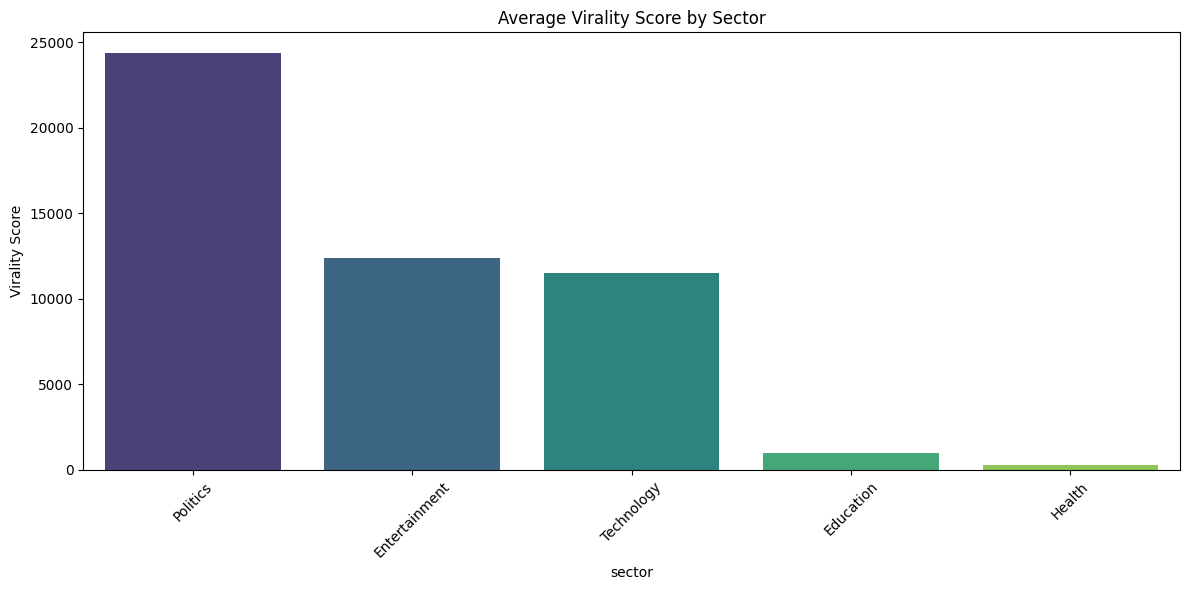

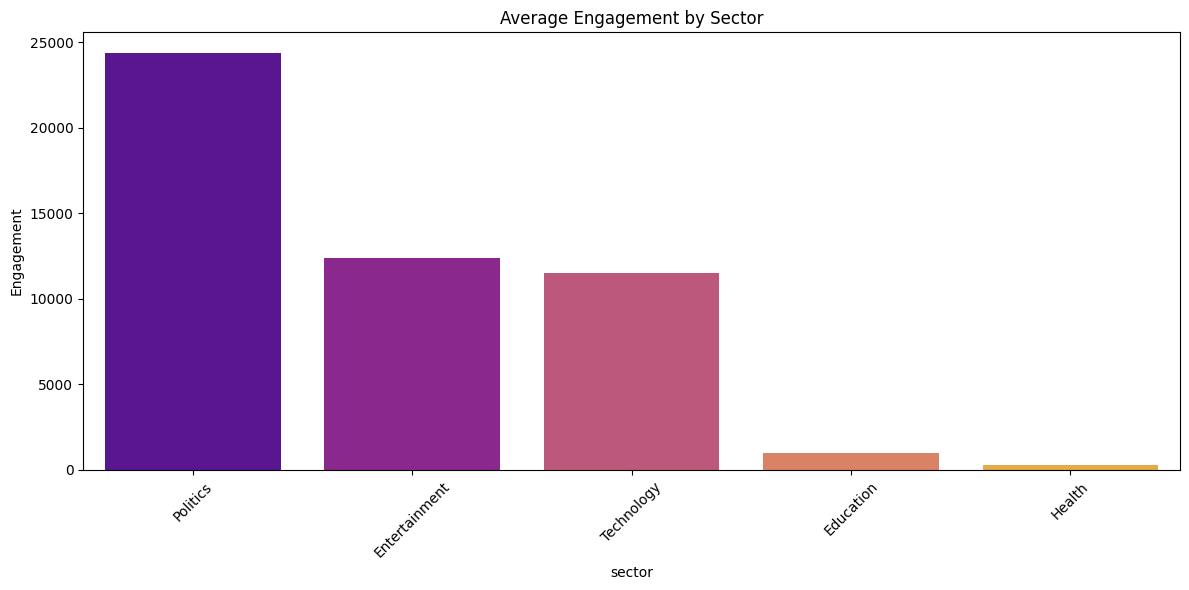

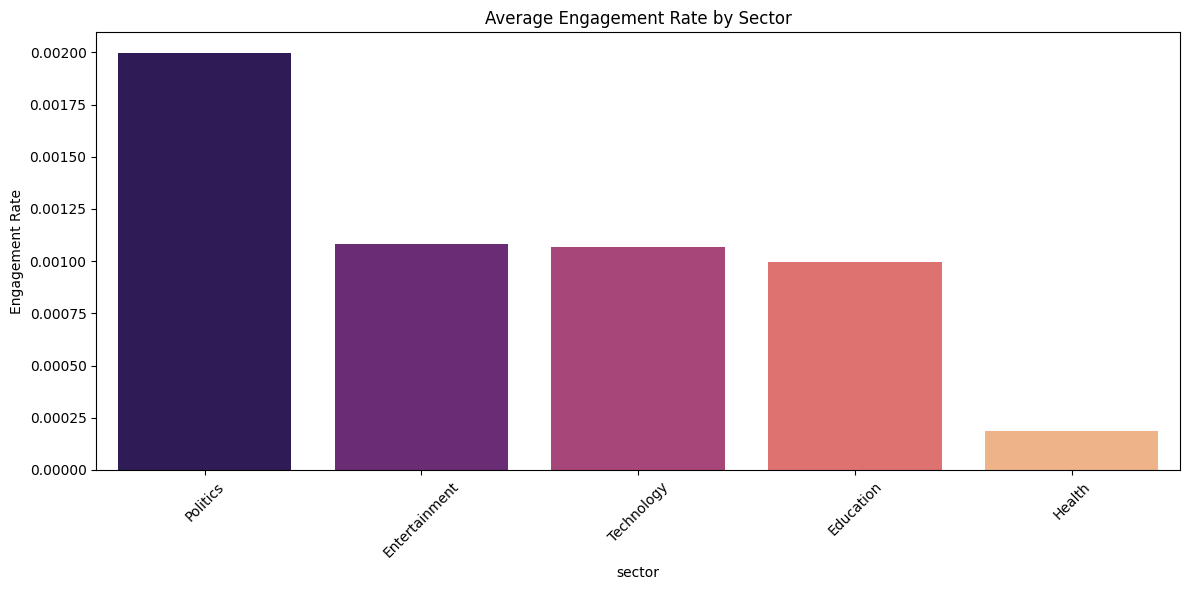

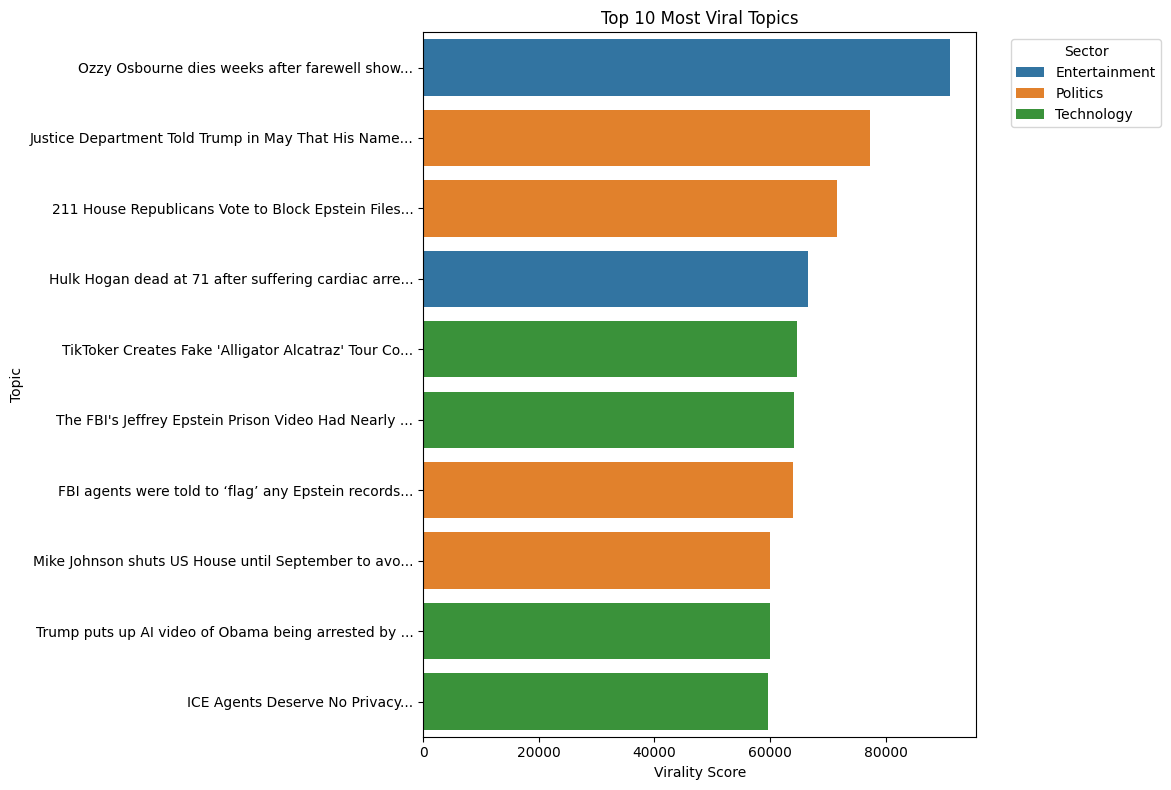

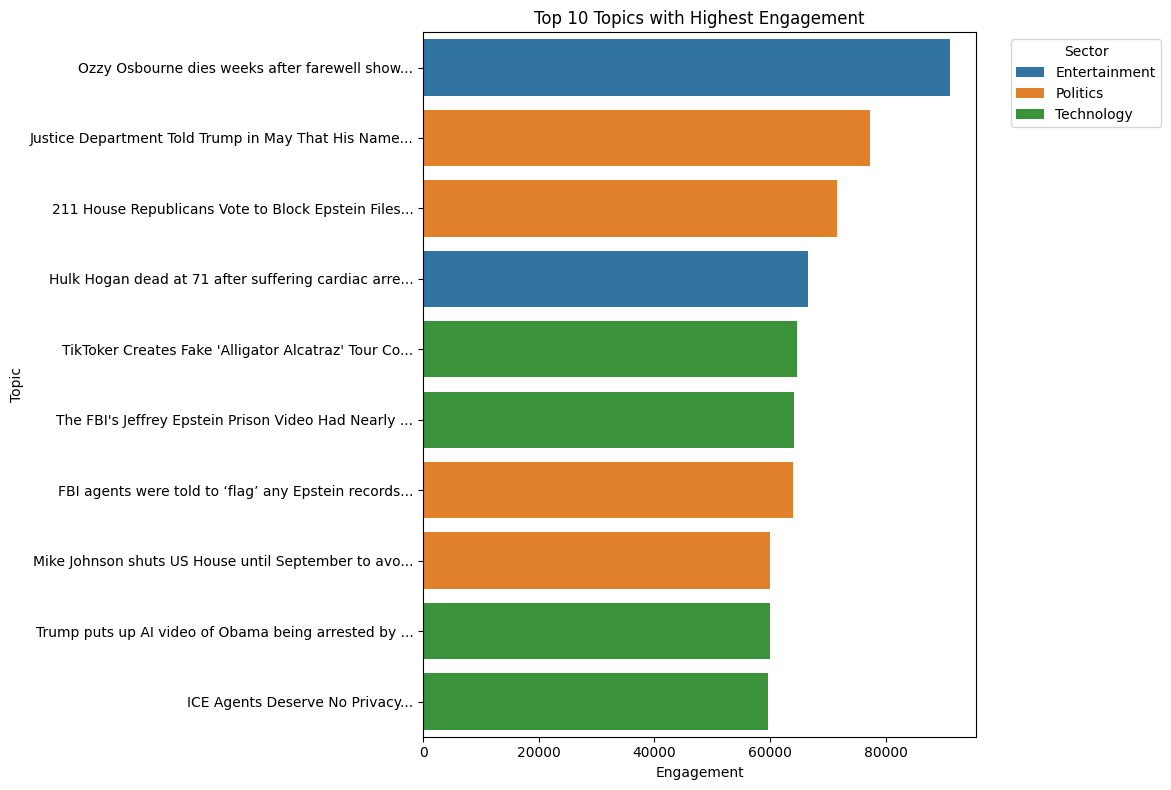

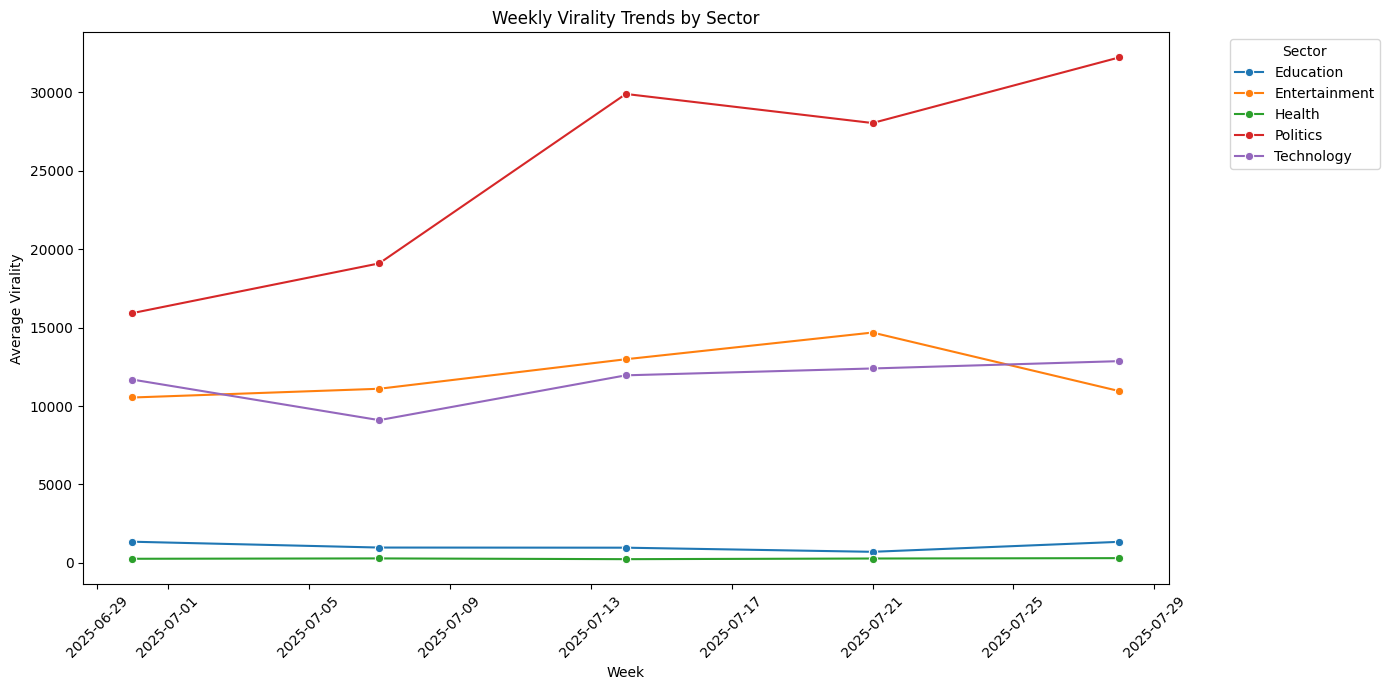

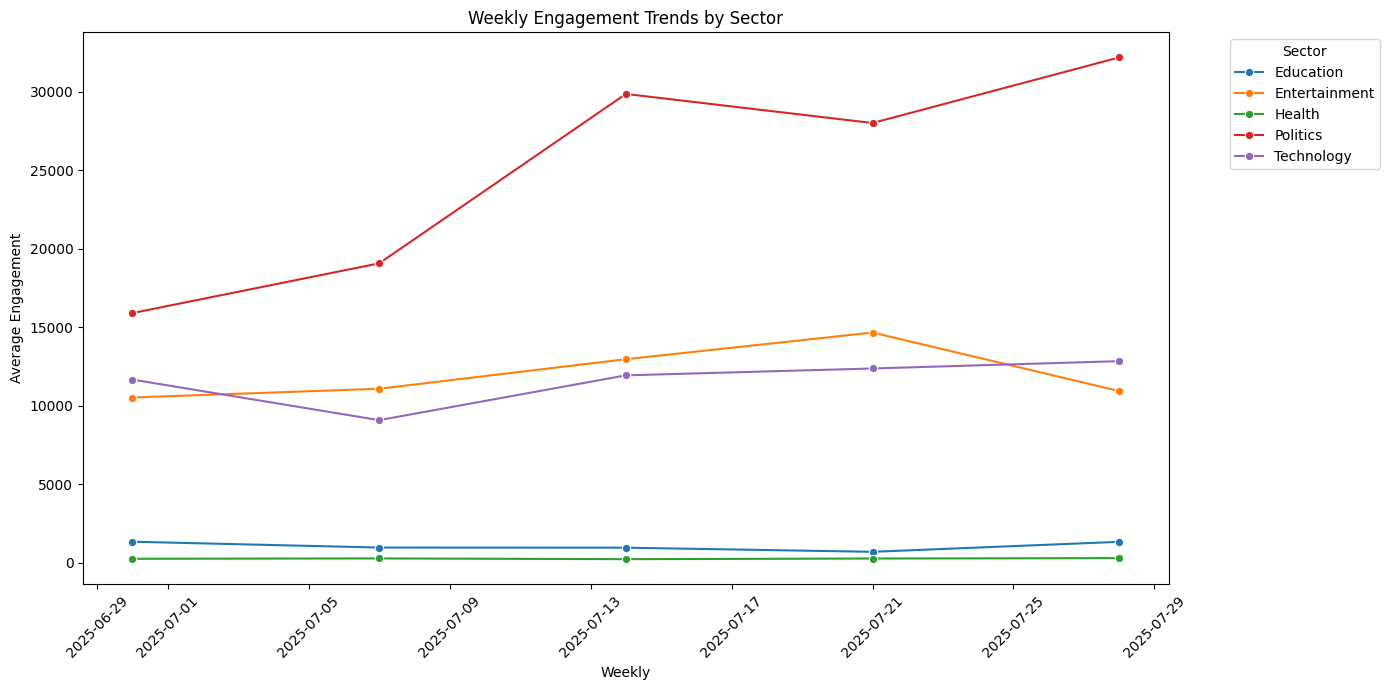

=== Reddit Performance Analysis ===

Sector Performance Summary:
               virality                    engagement                     \
                   mean   median       std       mean   median       std   
sector                                                                     
Education       1015.76    341.0   1331.75    1015.53    341.0   1331.61   
Entertainment  12385.67   9616.0  12306.75   12381.53   9614.0  12302.75   
Health           273.25    213.0    225.65     273.03    213.0    225.42   
Politics       24355.94  24365.0  20163.84   24347.53  24355.0  20156.39   
Technology     11500.03   1497.0  16734.85   11494.51   1495.0  16728.56   

              post_id  
                count  
sector                 
Education         150  
Entertainment     250  
Health            199  
Politics          150  
Technology        150  


Top Performing Subreddits by Sector:

Education:
           virality  engagement
subreddit                      
Teachers    2451.58

In [3]:
subreddit_map = {
        'Education': ['education', 'AskAcademia', 'Teachers'],
        'Entertainment': ['movies', 'Music', 'gaming', 'television','RugsOnly'],
        'Politics': ['politics', 'worldnews', 'PoliticalDiscussion'],
        'Technology': ['technology', 'programming', 'technews'],
        'Health': ['health', 'mentalhealth', 'nutrition', 'fitness']
    }
    
    # Fetch real Reddit data
if CLIENT_ID and CLIENT_SECRET and USER_AGENT:
    fetcher = DataFetchers.RedditDataFetcher(CLIENT_ID, CLIENT_SECRET, USER_AGENT)
    real_data = fetcher.fetch_posts(subreddit_map, time_filter='month', limit=50)
        
    if not real_data.empty:
        # Analyze the real data
        analyzer = SocialMediaAnalyzers.RedditSocialMediaAnalyzer(real_data)
            
        # Generate visualizations
        analyzer.analyze_sector_performance()
        analyzer.analyze_topic_performance()
        analyzer.analyze_trends()
            
        # Generate text report
        analyzer.generate_report()
    else:
        print("No data fetched. Check your API credentials or subreddit names.")
else:
    print("Reddit API credentials not found. Please set environment variables:")
    print("REDDIT_CLIENT_ID, REDDIT_CLIENT_SECRET, REDDIT_USER_AGENT")

## **Main Script (Twitter)**

c:\Users\34658\Downloads\cosas\social-media-analysis\src\SocialMediaAnalyzers.py:162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  self.df['week'] = self.df['date'].dt.to_period('W')
c:\Users\34658\Downloads\cosas\social-media-analysis\src\SocialMediaAnalyzers.py:163: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  self.df['month'] = self.df['date'].dt.to_period('M')


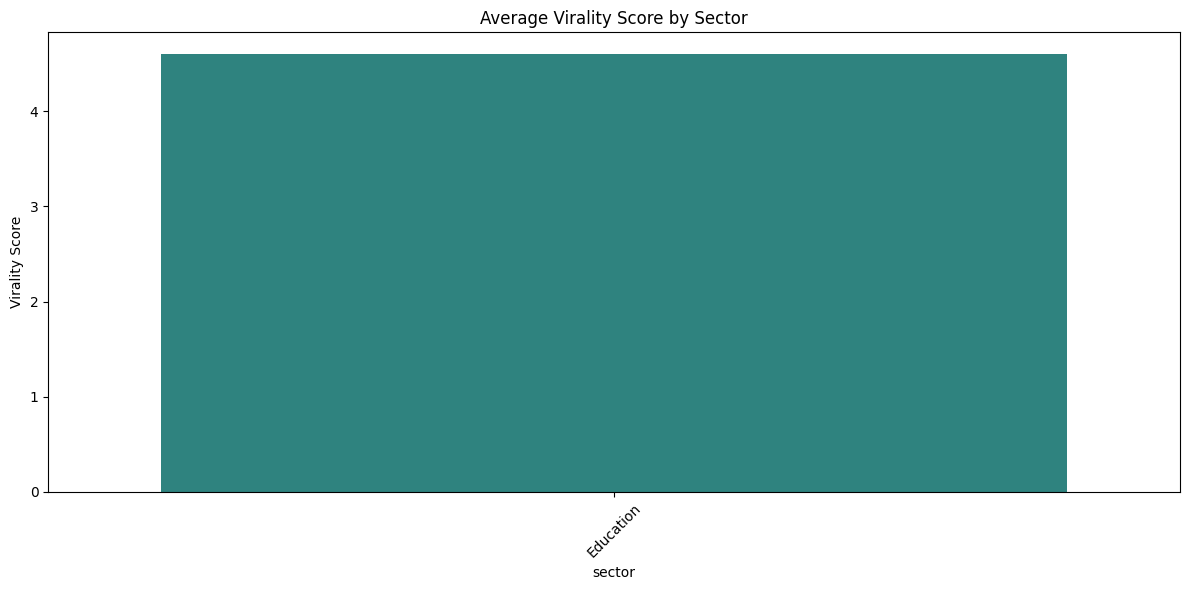

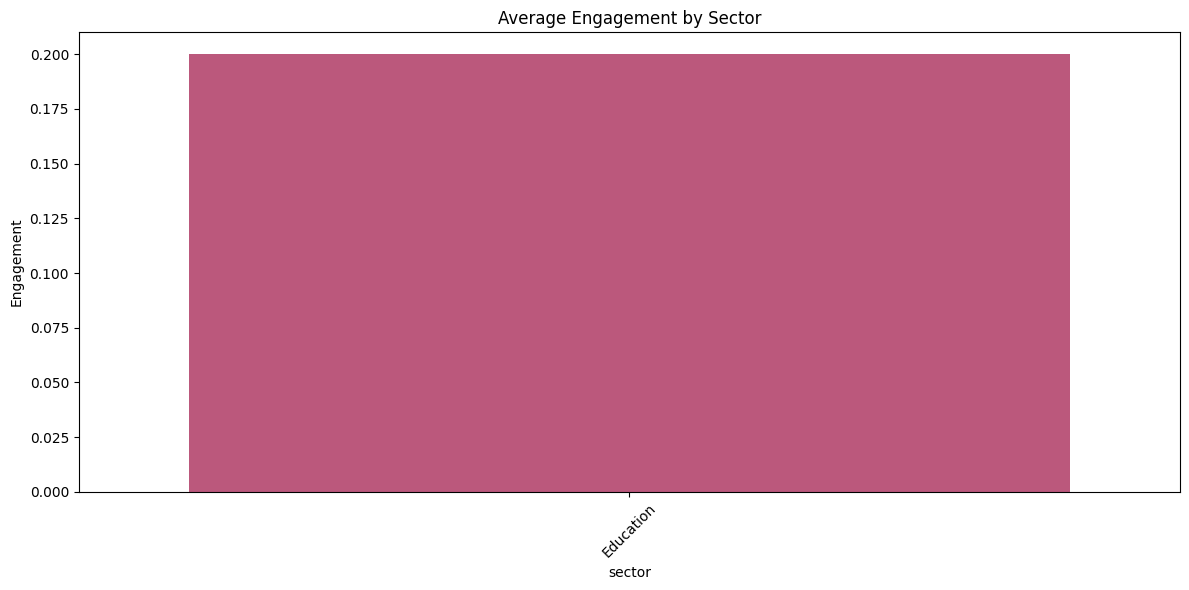

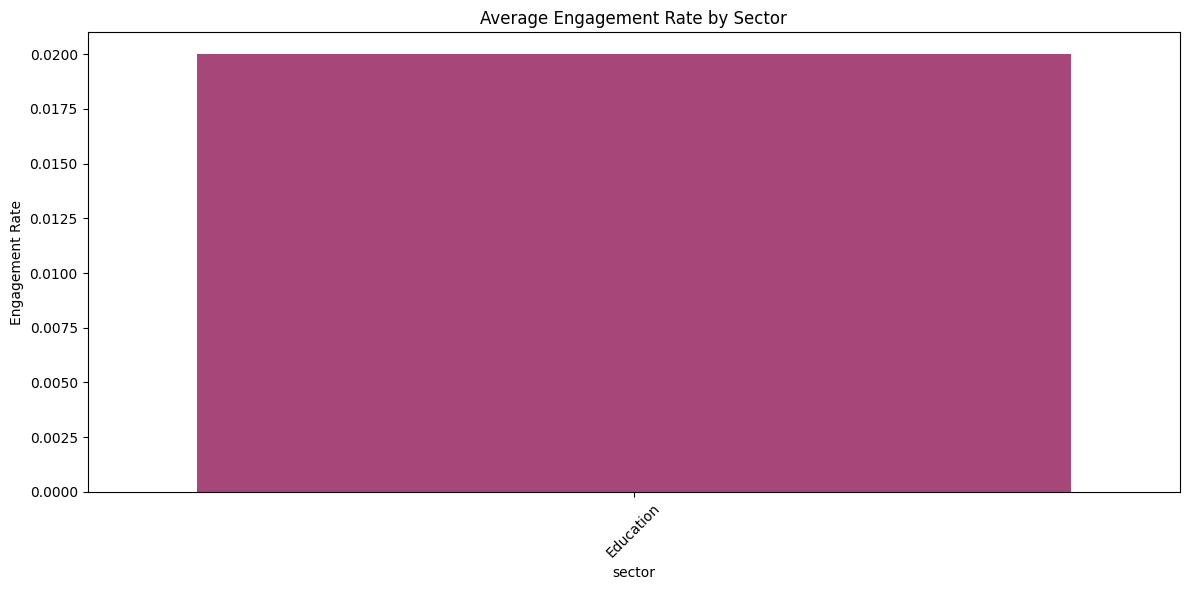

c:\Users\34658\Downloads\cosas\social-media-analysis\src\SocialMediaAnalyzers.py:226: UserWarning: Glyph 2332 (\N{DEVANAGARI LETTER JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\34658\Downloads\cosas\social-media-analysis\src\SocialMediaAnalyzers.py:226: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
c:\Users\34658\Downloads\cosas\social-media-analysis\src\SocialMediaAnalyzers.py:226: UserWarning: Glyph 2351 (\N{DEVANAGARI LETTER YA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\34658\Downloads\cosas\social-media-analysis\src\SocialMediaAnalyzers.py:226: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\34658\Downloads\cosas\social-media-analysis\src\SocialMediaAnalyzers.py:226: UserWarning: Glyph 2369 (\N{DEVANAGARI VOWEL SIGN U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\34658\Downloads\cosas\social-media-analys

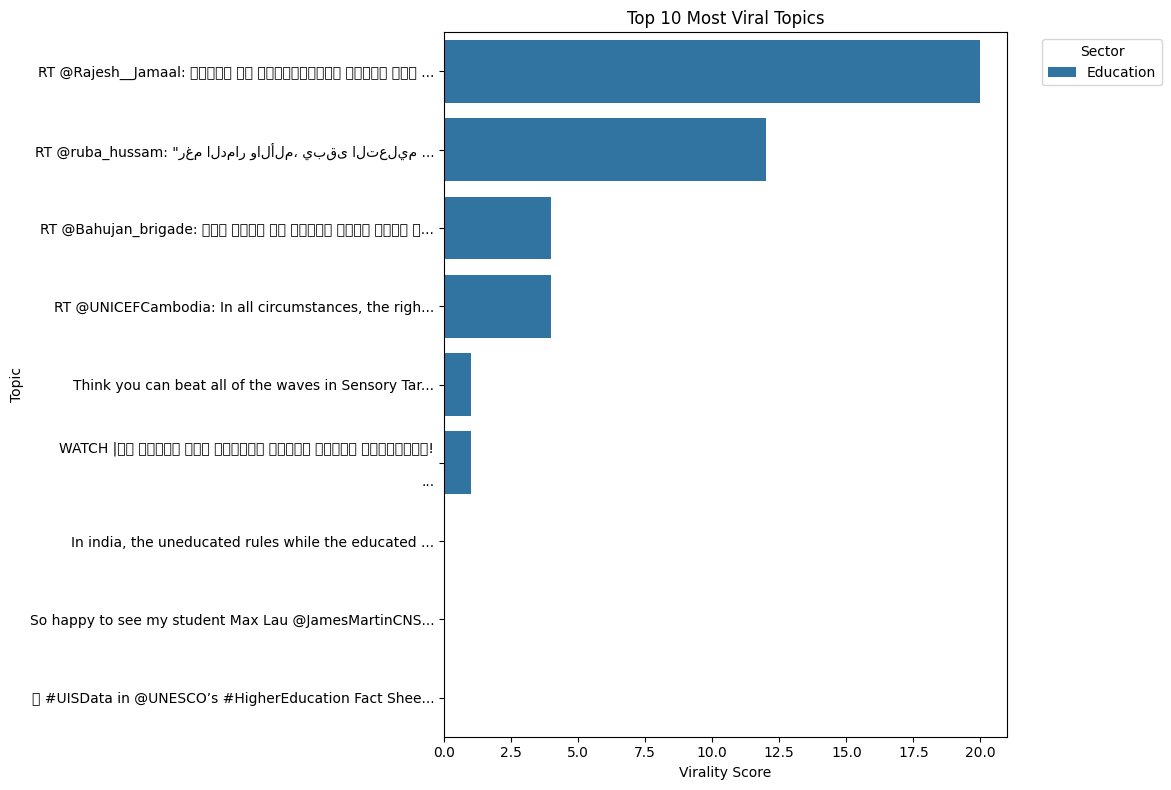

c:\Users\34658\Downloads\cosas\social-media-analysis\src\SocialMediaAnalyzers.py:237: UserWarning: Glyph 2311 (\N{DEVANAGARI LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\34658\Downloads\cosas\social-media-analysis\src\SocialMediaAnalyzers.py:237: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
c:\Users\34658\Downloads\cosas\social-media-analysis\src\SocialMediaAnalyzers.py:237: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\34658\Downloads\cosas\social-media-analysis\src\SocialMediaAnalyzers.py:237: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\34658\Downloads\cosas\social-media-analysis\src\SocialMediaAnalyzers.py:237: UserWarning: Glyph 2377 (\N{DEVANAGARI VOWEL SIGN CANDRA O}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\34658\Downloads\cosas\social-media-

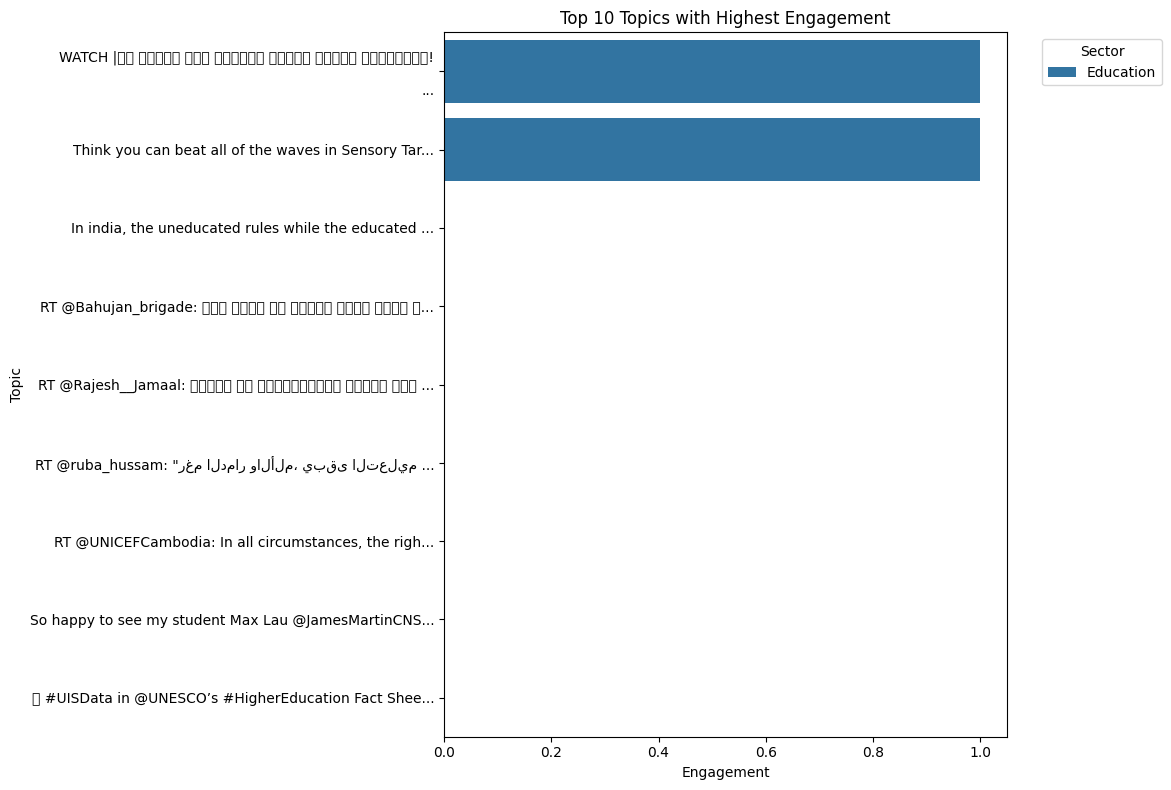

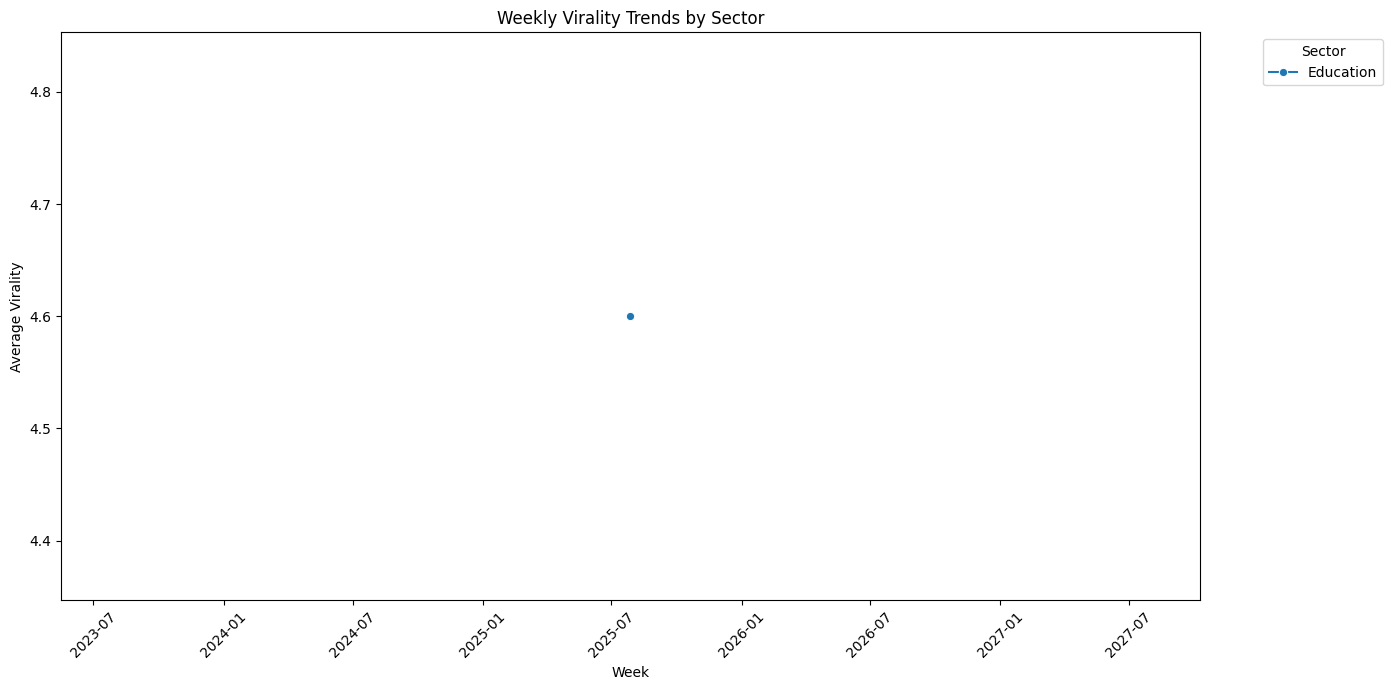

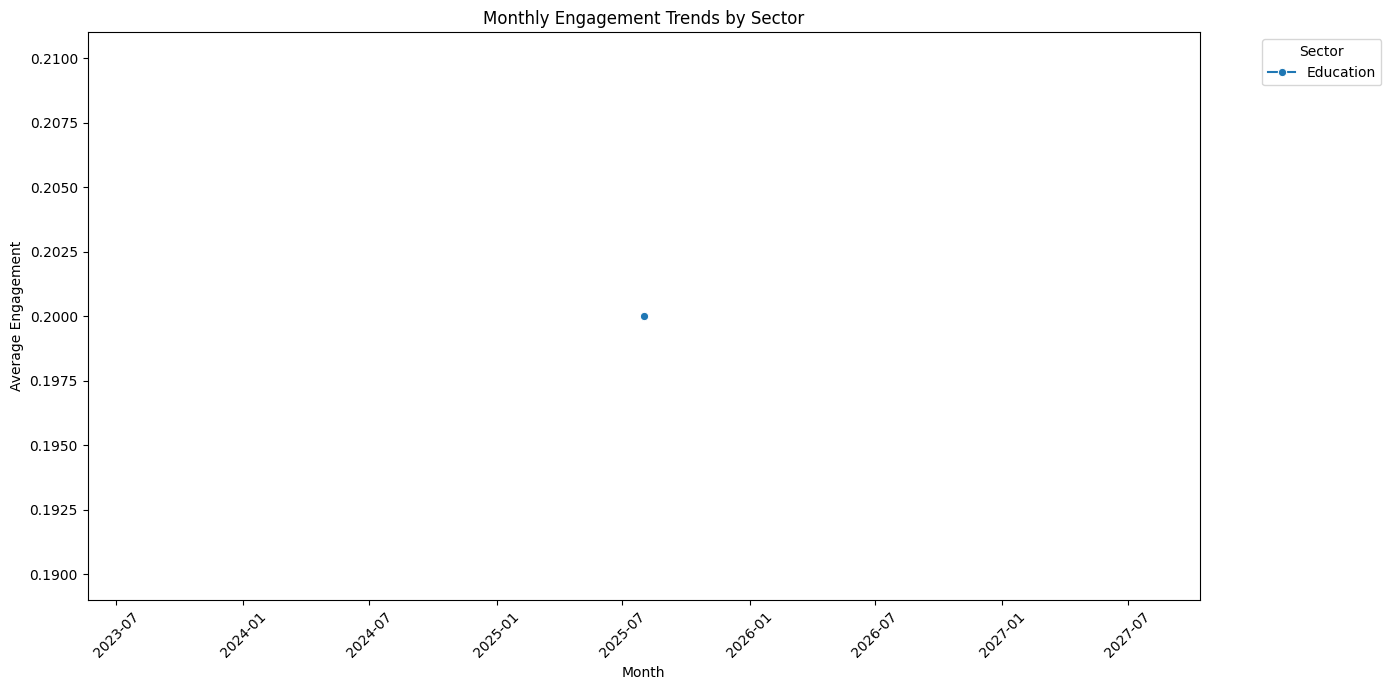

=== Twitter Performance Analysis ===

Sector Performance Summary:
          virality              engagement              tweet_id
              mean median   std       mean median   std    count
sector                                                          
Education      4.6    2.5  6.52        0.2    0.0  0.42       10


Top Performing Topics by Sector:

Education:
                                                    virality  engagement
topic                                                                   
RT @Rajesh__Jamaal: जयपुर के विद्याश्रम स्कूल म...      20.0         0.0
RT @ruba_hussam: "رغم الدمار والألم، يبقى التعل...      12.0         0.0

=== Analysis Complete ===


In [ ]:
# Define keywords or targets by sector for Twitter
keyword_map = {
    'Education': ['#education','math','#history','school'],
    'Entertainment': ['#movies', '#music', '#gaming', '#television'],
    'Politics': ['#politics', '#worldnews', '#politicaldiscussion','inmigration'],
    'Technology': ['#technology', '#programming', '#technews','#AI'],
    'Health': ['#health', '#mentalhealth', '#nutrition', '#fitness']
}

# Make sure your Twitter API credentials are set
if BEARER_TOKEN:
    fetcher = DataFetchers.TwitterDataFetcher(BEARER_TOKEN)  # Assuming you defined this with your Twitter API code
    
    # Fetch tweets using your keywords per sector, time window, and limit per keyword
    #Warning: you will probably get rate limited if you're using free
    real_data = fetcher.fetch_tweets(keyword_map, max_results=10)
    
    if not real_data.empty:
        analyzer = SocialMediaAnalyzers.TwitterSocialMediaAnalyzer(real_data)
        
        # Generate visualizations and reports
        analyzer.analyze_sector_performance()
        analyzer.analyze_topic_performance()
        analyzer.analyze_trends()
        analyzer.generate_report()
    else:
        print("No tweets fetched. Check your API credentials or keyword list.")
else:
    print("Twitter API credentials not found. Please set your BEARER_TOKEN environment variable.")
